In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control
from numpy import sin, cos, tan, pi
from control import TransferFunction as TF

In [2]:
import txt_mixin

In [3]:
plt.rcParams['font.size'] = 14

In [4]:
import py_block_diagram

In [5]:
import importlib

In [6]:
importlib.reload(py_block_diagram)

<module 'py_block_diagram' from '/home/ryanwkrauss/git/py_block_diagram/py_block_diagram/__init__.py'>

In [7]:
import py_block_diagram as pybd

## System Description

In [8]:
U = pybd.int_constant_block(0,"U_cl")

In [9]:
U.place_absolute(0,0)

In [10]:
sum1 = pybd.summing_junction()

In [11]:
sum1.place_relative(U,"right")

In [12]:
sum1.set_input1(U)

In [13]:
D = pybd.PD_controller(3,0.1)

In [14]:
D.place_relative(sum1,"right")

In [15]:
D.set_input_block(sum1)

In [16]:
diff_motors = pybd.custom_actuator("dual_motors","two_motors_actuator","&motors")

In [17]:
pend_enc = pybd.custom_sensor("pend_enc","pendulum_encoder","")

In [18]:
G = pybd.plant(pend_enc,diff_motors,"Robot")

In [19]:
if1 = pybd.if_block()

In [20]:
const2 = pybd.int_constant_block(0, "const2")

In [21]:
sat = pybd.saturation_block()

In [22]:
sat.set_input_block(D)

In [23]:
sat.place_relative(D, "right")

In [24]:
if1.place_relative(sat, "right")

In [25]:
if1.width = 3

In [26]:
G.place_relative(if1,"right",5)

In [27]:
const2.place_relative(if1, "below", 2, xshift=-3)

In [28]:
G.set_input_block(if1)

In [29]:
Y = pybd.output_block("encoder",G)

In [30]:
Y.place_relative(G, "right",6)

In [31]:
Y.width = 4

In [32]:
sum1.set_input2(G)

In [33]:
gt1 = pybd.greater_than_block()

In [34]:
gt1.place_relative(if1, "above", 5, xshift=-5)

In [35]:
lc = pybd.loop_count_block()

In [36]:
lc.width = 5

In [37]:
const1 = pybd.int_constant_block(500,'const1')

In [38]:
lc.place_relative(gt1,"left",yshift=2)

In [39]:
const1.place_relative(gt1,"left", yshift=-2)

In [40]:
gt1.set_inputs(lc, const1)

In [41]:
if1.set_inputs(gt1, sat, const2)

In [42]:
block_list = [U,sum1, D, sat, if1, const2, gt1, const1, lc, G, Y]

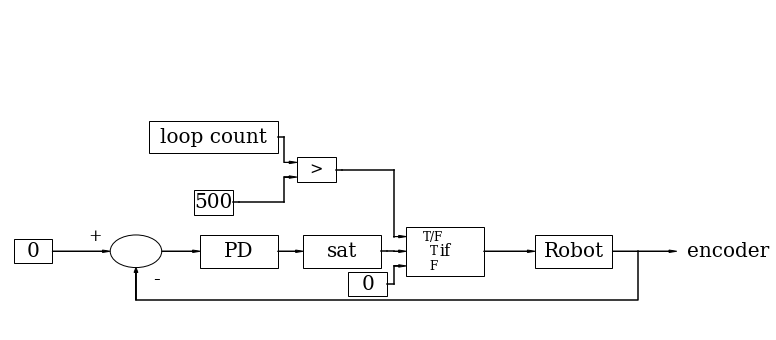

In [43]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
mysys = pybd.block_diagram(block_list,ax)
mysys.draw()
plt.xlim([-1,25])
plt.ylim([-5,15])
mysys.axis_off()

## Print Blocks

In [44]:
mysys.print_blocks = [lc,sat,gt1,if1,G]

## Execution Order

In [45]:
mysys.find_execution_order([U,lc,const1, const2, gt1])

In [46]:
mysys.execution_order

## Codegen Test

In [47]:
msg = "Cart Pendulum Vib Suppress 1"

In [48]:
mysys.welcome_msg = msg

In [49]:
ls *.ino

cart_pendulum_template1_vib_only.ino


In [50]:
template_fn = "cart_pendulum_template1_vib_only.ino"

In [51]:
mysys.generate_arduino_code("cart_pendulum_autogen_1_siso_vib_suppress", template_fn)

block: <py_block_diagram.int_constant_block object at 0x7d45d0f3e9b0>
block: <py_block_diagram.summing_junction object at 0x7d45d0f34748>
block: <py_block_diagram.PD_controller object at 0x7d45d0f250f0>
block: <py_block_diagram.saturation_block object at 0x7d45d0f348d0>
block: <py_block_diagram.if_block object at 0x7d45d0edaf60>
block: <py_block_diagram.int_constant_block object at 0x7d45d0f25ba8>
block: <py_block_diagram.greater_than_block object at 0x7d45d0f179e8>
block: <py_block_diagram.int_constant_block object at 0x7d45d0ea5438>
block: <py_block_diagram.loop_count_block object at 0x7d45d0f17e80>
block: <py_block_diagram.plant object at 0x7d45d0f172e8>
block: <py_block_diagram.output_block object at 0x7d45d0f170b8>
